# Summary:
This notebook encompasses data wrangling and exploratory data analysis (EDA) to comprehend the nuances of the DataFrame and prepare a suitable dataset for modeling various Naive Bayes classifiers.

### Data Wrangling:
- No duplicate rows or columns were identified, and there were no instances of missing values.
- Education: Since there was a ordinal difference in the types of education level, I decided to continue with the 1, 2, 3 contained in the original DataFrame
- Experience: Addressed negative experience values by setting the minimum age (23) as experience = 0. For other cases, age minus 23 was used to ensure positive values.
- Zipcodes: Leveraged the Google API to acquire latitude and longitude data for different zipcodes, facilitating map plotting. Corrected NaN coordinates due to typos. Attempted to supplement data with Average Household income via the Census API based on 2021 Census Data; however, the response didn't yield values.

### EDA:
- The target variable is imbalanced, around 90% of the instances being negative.
- Non of the applicable variables seemed to follow a normal distribution, although I didn’t further validate with a Shapiro-Wilk test.
- Age ranged from 23 to 67, while income spanned from 8,000 to 224,000.
- Online banking usage was prevalent, but other products displayed lower penetration (below 50%).
- Since income is one of the most relevant variables, I conducted different scatterplots. As expected, there is a lineal correlation between CCAvg and income, but no relationship was present between Age/ Experience and income.
- The 1st quartile of income is similar regardless the family number, but the median and third quartile are higher for families of two.
- To address multicollinearity, I removed the age column, since it had a correlation of 0.99 with experience 

**Variables**
- ID: Customer ID
- Age: Customer's age in completed years
- Experience:	#years of professional experience
- Income:	Annual income of the customer ($000)
- ZIPCode: Home Address ZIP code.
- Family:	Family size of the customer
- CCAvg:	Avg. spending on credit cards per month ($000)
- Education:	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage:	Value of house mortgage if any. ($000)
- Personal Loan:	Did this customer accept the personal loan offered in the last campaign?
- Securities Account:	Does the customer have a securities account with the bank?
- CD Account:	Does the customer have a certificate of deposit (CD) account with the bank?
- Online:	Does the customer use internet banking facilities?
- CreditCard:	Does the customer use a credit card issued by UniversalBank?

#### Libraries

In [55]:
# Importing the libraries
import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

#Requests
import requests

## Functions:

In [4]:
def get_latitude_longitude(zipcode, api_key):
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {
        "address": f"{zipcode}",
        "key": api_key
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    if data["status"] == "OK":
        latitude = data["results"][0]["geometry"]["location"]["lat"]
        longitude = data["results"][0]["geometry"]["location"]["lng"]
        return latitude, longitude
    else:
        return None, None

In [5]:
#Creating the DF
df = pd.read_excel("../data/Bank_Personal_Loan_Data.xlsx")

#Sanity check:
df.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [6]:
#Missing values:
df.isna().sum()

#There are no missing values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
#Value count
df.count()

#All the variables contain 5,000 records

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [8]:
#Looking for duplicates rows:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

#Looking for duplicate columns:
print(f"Number of duplicate columns: {df.T.duplicated().sum()}")

Number of duplicate rows: 0
Number of duplicate columns: 0


#### Data Wrangling:

- Education: since there is an ordinal difference in the types of education level, I will leave it with the 1, 2 and 3 contained in the original DataFrame

In [9]:
#General information:
df.describe()

# The experience has to be fixed, one value cannot be negative

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
#Education distribution
df["Education"].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [11]:
#Zipcodes Review
print(df["ZIP Code"].info())
print(f"Maximum ZIP Code number: {df['ZIP Code'].max()}")
print(f"Minimum ZIP Code number: {df['ZIP Code'].min()}")


<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: ZIP Code
Non-Null Count  Dtype
--------------  -----
5000 non-null   int64
dtypes: int64(1)
memory usage: 39.2 KB
None
Maximum ZIP Code number: 96651
Minimum ZIP Code number: 9307


In [12]:
#Distinct ZIP codes
zipcodes = df["ZIP Code"].unique()

print(f"number of different ZIP Codes: {len(zipcodes)}")

number of different ZIP Codes: 467


In [78]:
#api_key = '----'

In [81]:
# List to store latitude and longitude and storing it in a CSV
'''latitudes = []
longitudes = []

for code in zipcodes:
    lat, lon = get_latitude_longitude(code, api_key)
    latitudes.append(lat)
    longitudes.append(lon)

#New DataFrame with the ZIP codes, latitude, and longitude
zipdf = pd.DataFrame({"ZIP Code": zipcodes, "Latitude": latitudes, "Longitude": longitudes})

#zipdf.to_csv("../data/Bank_Personal_Loan_Zipcodes.csv", index=False)
'''


In [13]:
#Uploading the results
dfzip = pd.read_csv("../data/Bank_Personal_Loan_Zipcodes.csv")

dfzip.rename(columns={"ZIP Code": "Zipcode"}, inplace= True)

#Sanity check:
dfzip.head(5)

,Zipcode,Latitude,Longitude
0,91107,34.164240,-118.083005
1,90089,34.022013,-118.289205
2,94720,37.870151,-122.259461
3,94112,37.722549,-122.441062
4,91330,34.248946,-118.525807


In [14]:
#Reviewing NA's
dfzip[dfzip["Latitude"].isna()==True]

# 90210 zipcodes: Latitude: 34.073620,  Longitude: -118.400352

#Replacing the NaN values of the 90210 with the internet lat and long
dfzip.loc[dfzip["Zipcode"] == 90210, ["Latitude", "Longitude"]] = [34.073620, -118.400352]

#Sanity check:
dfzip[dfzip["Latitude"].isna()==True]

,Zipcode,Latitude,Longitude
210,9307,NaN,NaN


In [15]:
#Fixing 9307. After some research, I concluded that it is a typo and the actual number is 90307, which is the code of Inglewood

#Reviewing if the Zipcode of Inglewood exists and it is a typo
dfzip[dfzip["Zipcode"] == 90307].value_counts()

#Modyfing Inglewood = 90307 and adding the coordinates
dfzip.loc[dfzip["Zipcode"] == 9307, :] = [90307, 33.961018, -118.355370]

#Sanity check:
dfzip[dfzip["Latitude"].isna()==True]


,Zipcode,Latitude,Longitude


In [144]:
#To quantify the Zipcodes, I will include the average household income of the 2021 Census data

#List of the average incomes
avg_income = []

#str_zipcodes = [str(code) for code in zipcodes]

#API call to get the incomes and store them on a list
for code in zipcodes:
    base_url = f"https://api.census.gov/data/2020/acs/acs5/profile"
    params = {
        "get": "DP03_0062E",  # Household Income estimate
        "for": code
    }

    try:
        response = requests.get(base_url, params=params)
        data = response.json()
    except:
        data = "NaN"

    if len(data) > 1:
        avg_income.append(data[1][0])
    else:
        avg_income.append(0)


In [142]:
#Adding the average incomes to the zipcodes' DF
dfzip["Avg_income"] = avg_income

#Sanity check:
dfzip.head(5)

,Zipcode,Latitude,Longitude,Avg_income
0,91107,34.164240,-118.083005,a
1,90089,34.022013,-118.289205,a
2,94720,37.870151,-122.259461,a
3,94112,37.722549,-122.441062,a
4,91330,34.248946,-118.525807,a


#### Distribution of the variables:

In [16]:
#Numerical variables:
num_cols = df[["Age", "Experience", "Income", "CCAvg", "Mortgage"]].columns.to_list()

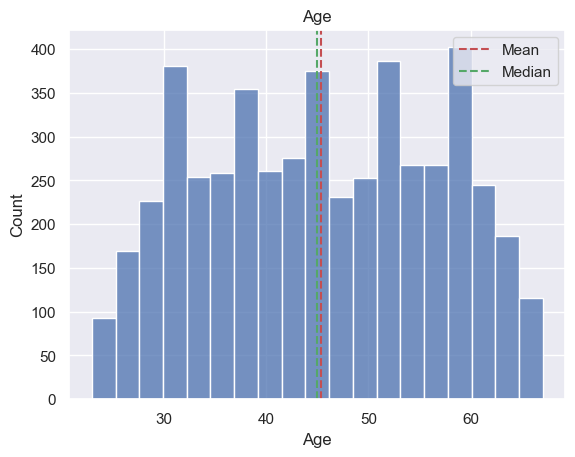

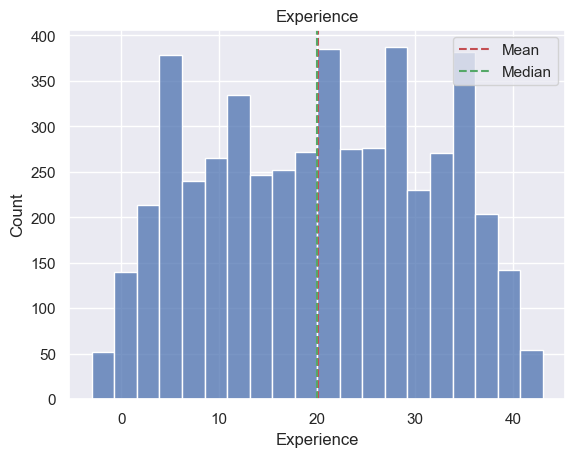

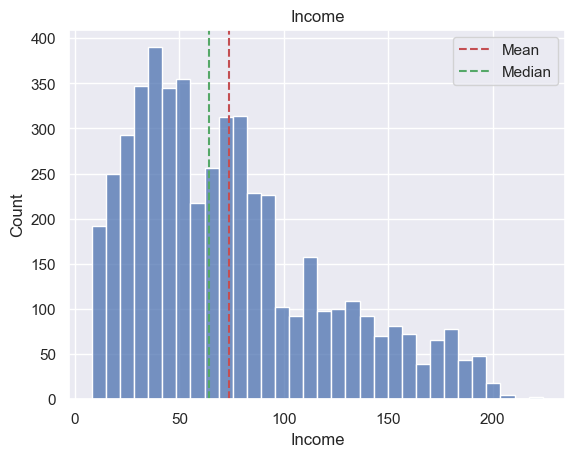

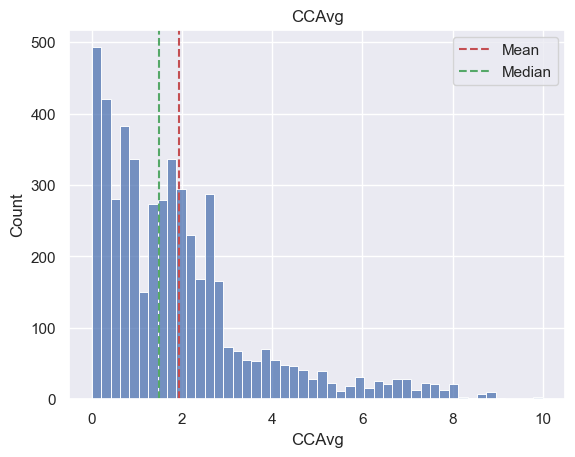

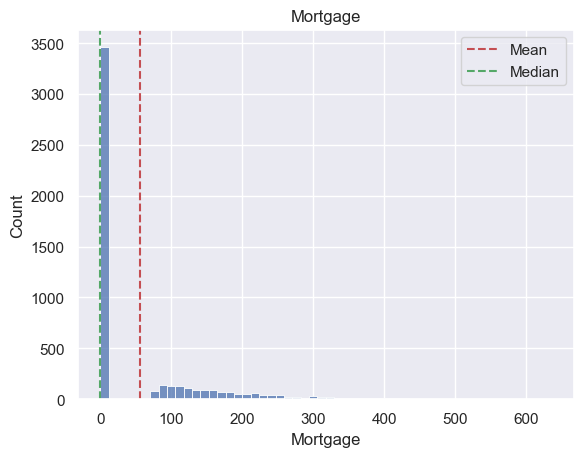

In [17]:
#Plotting the distribution
for col in num_cols:
    sns.set(style="darkgrid")
    # Create a figure and an Axes object (hist)
    fig, hist = plt.subplots()
    sns.histplot(data=df, x=col, ax=hist)
    plt.title(col)

    # Calculate mean and median
    mean_val = df[col].mean()
    median_val = df[col].median()

    # Add vertical lines for mean and median
    hist.axvline(mean_val, color="r", linestyle="--", label="Mean")
    hist.axvline(median_val, color="g", linestyle="--", label="Median")

    # Add legend
    hist.legend()

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

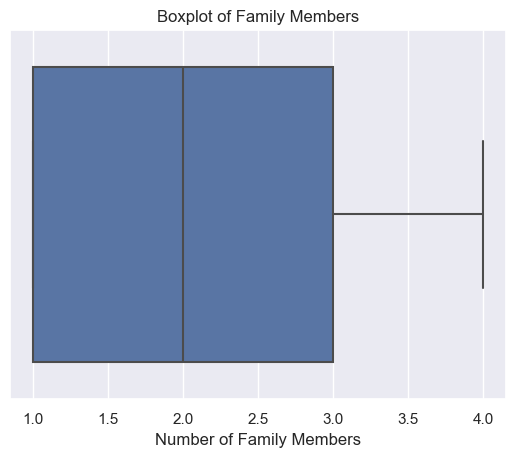

In [18]:
#Family:

sns.set(style="darkgrid")
sns.boxplot(x=df["Family"])

plt.xlabel("Number of Family Members")
plt.title("Boxplot of Family Members")


plt.show

In [20]:
##Binary columns:
bin_cols = df[["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]].columns.to_list() #List of the columns




['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

In [36]:
def binary_distribution(df, col_list):
    sns.set(style="darkgrid")
    
    for col in col_list:
        plt.figure(figsize=(6, 4))  # Set the figure size
        ax = sns.countplot(
            x=col,
            data=df,
            palette="Paired"  # Set color palette for the plot
        )
        plt.title(f"Distribution of {col}")
        plt.ylabel("Count")
        plt.xlabel(col)
        
        # Annotate the total count on top of each bar
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
        
        plt.show()

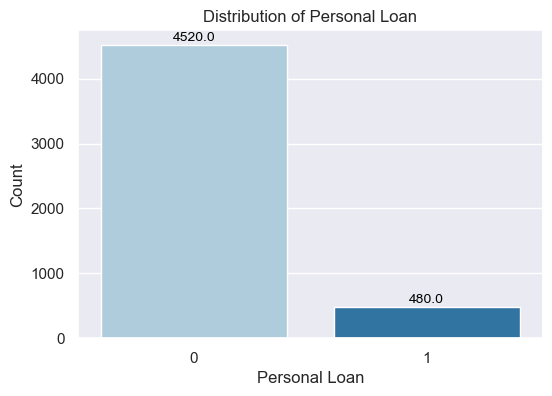

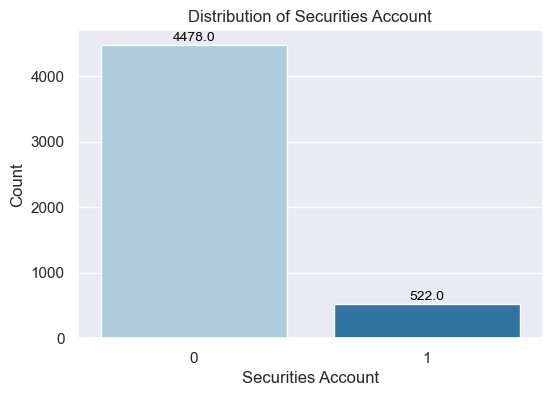

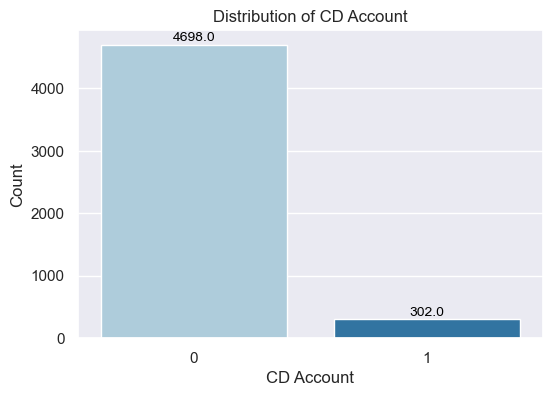

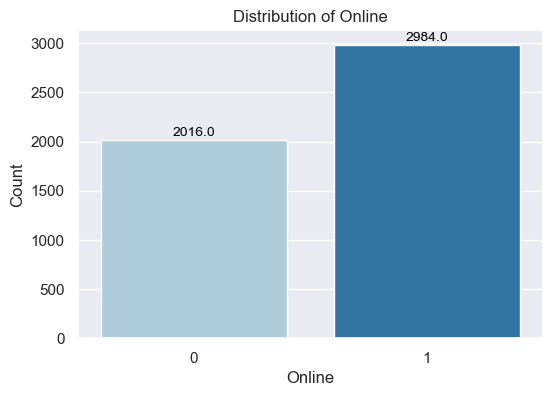

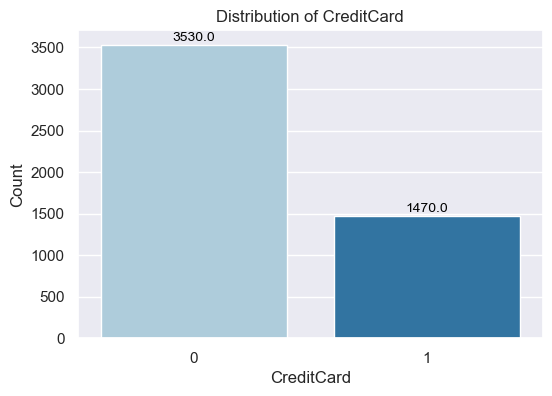

In [37]:
binary_distribution(df, bin_cols)

In [27]:
df["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [56]:
#Experience:
#Reviewing the cases where it is -3
df[df["Experience"] == -3]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2618,2619,23,-3,55,92704,3,2.4,2,145,0,0,0,1,0
3626,3627,24,-3,28,90089,4,1.0,3,0,0,0,0,0,0
4285,4286,23,-3,149,93555,2,7.2,1,0,0,0,0,1,0
4514,4515,24,-3,41,91768,4,1.0,3,0,0,0,0,1,0


In [57]:
#Experience median and mean
print(f"""
- Experience mean: {df["Experience"].mean()}
- Experience median: {df["Experience"].median()}
- Age mean: {df["Age"].mean()}
- Age median: {df["Age"].median()}
- Age minimum: {df["Age"].min()}
""")


- Experience mean: 20.1046
- Experience median: 20.0
- Age mean: 45.3384
- Age median: 45.0
- Age minimum: 23



In [58]:
#Revieweing the Negative values
df[(df["Age"] == 23) | (df["Experience"] < 0)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.300000,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.700000,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.300000,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.750000,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.200000,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.400000,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.300000,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.300000,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.700000,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.200000,1,0,0,1,0,0,1


In [59]:
# Replace negative Experience values with Age - 23
df.loc[df["Experience"] < 0, "Experience"] = df.loc[df["Experience"] < 0, "Age"] - 23

#Sanity check:
df["Experience"].min()


0

Income:



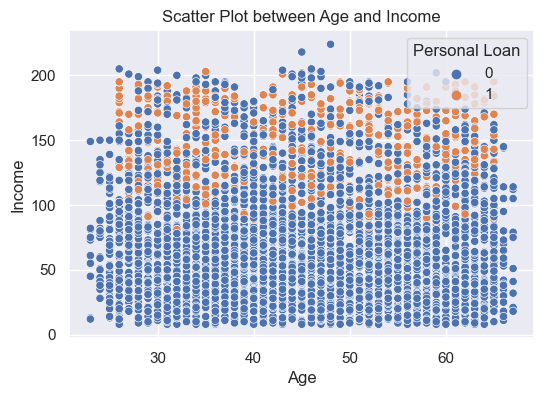

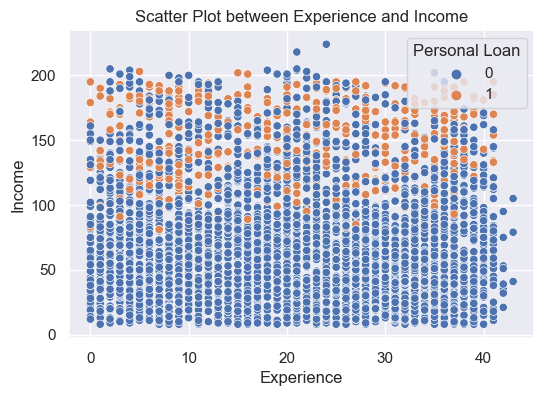

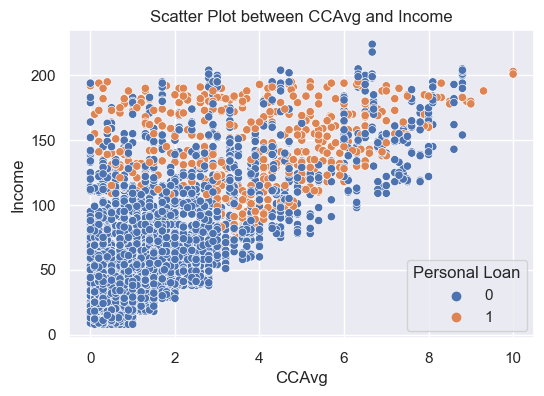

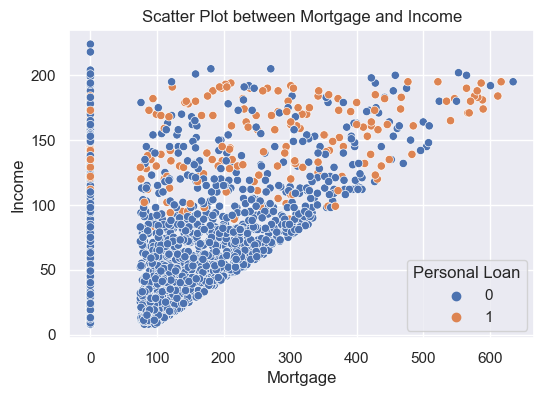

In [60]:
cols = df[["Age", "Experience", "CCAvg", "Mortgage"]].columns.to_list()

for c in cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[c],  # Use c for the x-axis
                    y=df["Income"],  # Use "Income" for the y-axis
                    hue='Personal Loan',
                    data=df
                    )
    plt.title(f"Scatter Plot between {c} and Income")
    plt.xlabel(c)
    plt.ylabel("Income")
    plt.legend(title="Personal Loan")
    plt.show()

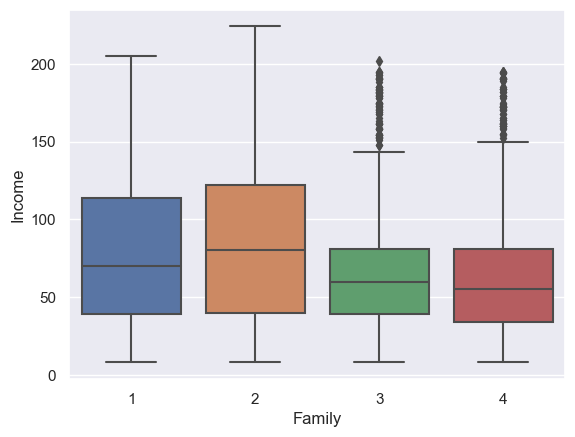

In [61]:
#Family:

sns.set(style="darkgrid")
sns.boxplot(
    x=df["Family"],
    y=df["Income"]
)
plt.show()

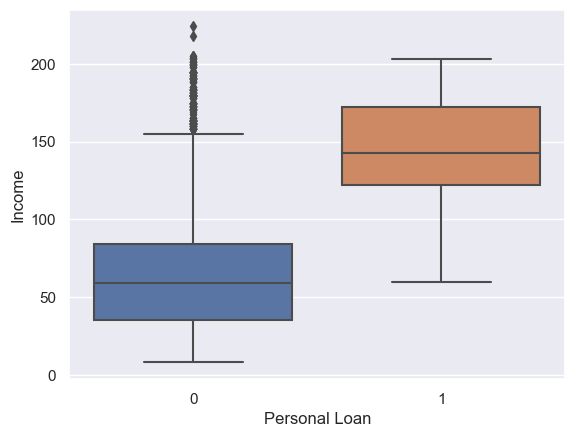

In [62]:
#Family:

sns.set(style="darkgrid")
sns.boxplot(
    x=df["Personal Loan"],
    y=df["Income"]
)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

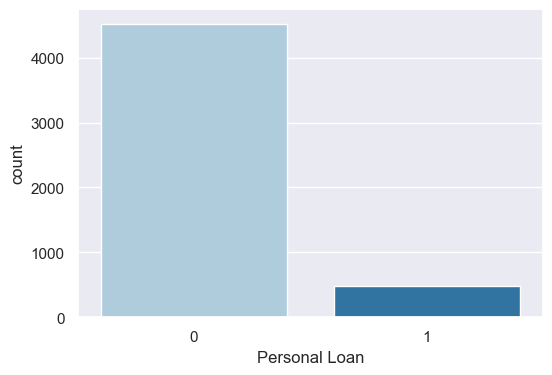

In [63]:
#Target variable:

plt.figure(figsize= (6,4))
sns.countplot(
    data = df,
    x = df["Personal Loan"],
    palette= "Paired"
)
plt.show


### Correlations:

In [64]:
correlationdf = df[["Age", "Experience", "Income", "CCAvg", "Mortgage"]]

Text(0.5, 1.0, 'Correlation matrix')

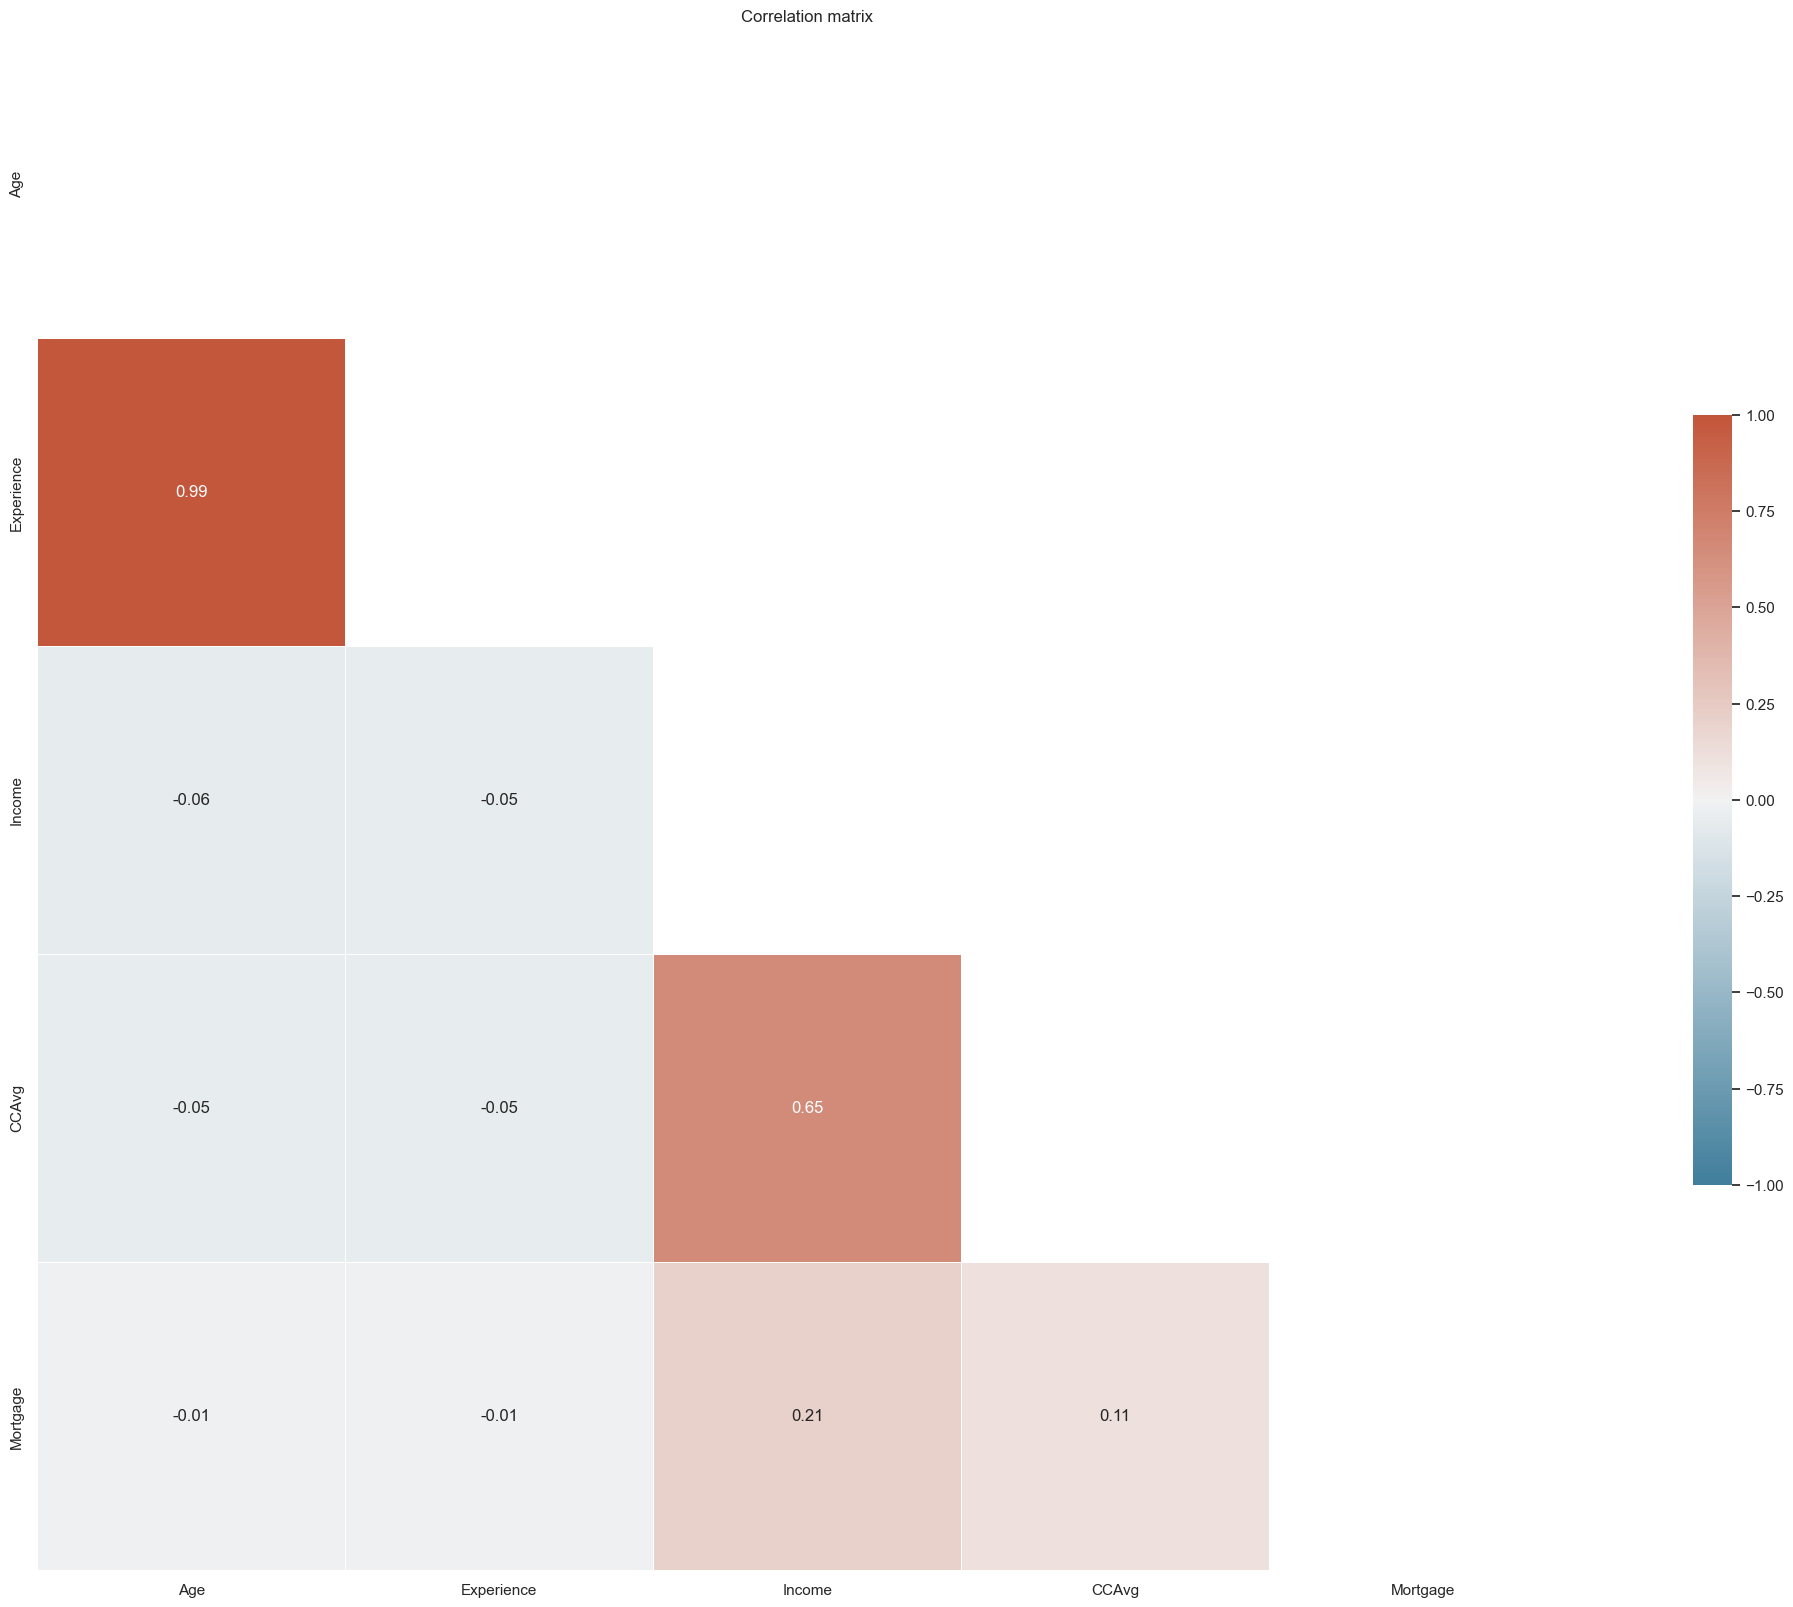

In [65]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = correlationdf.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title("Correlation matrix")

To address multicollinearity, I will remove the Age column

In [66]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [67]:
df2 = df.drop(["Age", "ZIP Code", "ID"], axis = 1)

In [68]:
df2.describe()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,20.135400,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.414672,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [69]:
#Storing it in a CSV
pd.DataFrame(df2).to_csv('../data/clean_df.csv')